In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Тренировочный датасет

In [13]:
iris = datasets.load_iris()

data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
data['target'] = pd.Series(iris['target'])

data['target_name'] = data['target'].replace([0, 1, 2], list(iris['target_names']))

In [14]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


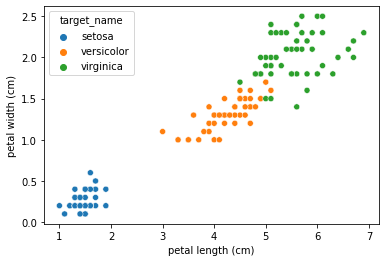

In [16]:
sns.scatterplot(data=data, x='petal length (cm)', y='petal width (cm)', hue='target_name');

In [17]:
features = ['petal length (cm)', 'petal width (cm)']
data = data[features]
data.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


#### Стандартизация данных

In [21]:
st = StandardScaler()
st.fit(data)

data_sc = st.transform(data)

data_sc = st.fit_transform(data)

In [25]:
pd.DataFrame(data_sc, columns=features).head()

,petal length (cm),petal width (cm)
0,-1.340227,-1.315444
1,-1.340227,-1.315444
2,-1.397064,-1.315444
3,-1.283389,-1.315444
4,-1.340227,-1.315444


#### Рассчет главных компонент

In [51]:
pca = PCA()
iris_after_pca = pca.fit_transform(data_sc)

In [52]:
pca_iris = pd.DataFrame(iris_after_pca, columns=['pc1', 'pc2'])
pca_iris.head()

,pc1,pc2
0,-1.877843,0.017524
1,-1.877843,0.017524
2,-1.918033,0.057714
3,-1.837653,-0.022666
4,-1.877843,0.017524


In [54]:
data['target'] = pd.Series(iris['target'])

data['target_name'] = data['target'].replace([0, 1, 2], list(iris['target_names']))

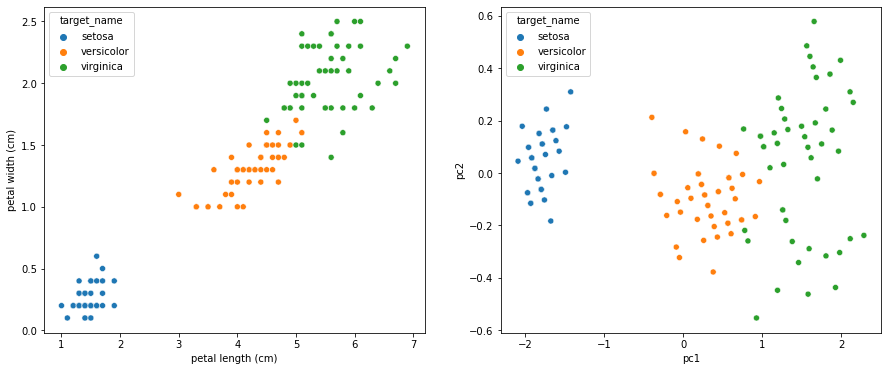

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(data=data, x='petal length (cm)', y='petal width (cm)', hue=data['target_name'], ax=ax1);
sns.scatterplot(data=pca_iris, x='pc1', y='pc2', hue=data['target_name'], ax=ax2);

In [56]:
pca.components_

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [ ]:
pc1 = 0.70710678 * data['petal length (cm)'] + 0.70710678 * data['petal width (cm)']
pc2 = -0.70710678 * data['petal length (cm)'] + 0.70710678 * data['petal width (cm)']

In [58]:
pca.explained_variance_ratio_

array([0.98143272, 0.01856728])

### Боевой датасет

In [69]:
data = pd.read_csv('diabetes.csv', index_col=0)
data = data.drop(['Outcome'], axis=1)
data.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


In [72]:
data.shape

(768, 7)

#### Стандартизация данных

In [74]:
data_sc = StandardScaler().fit_transform(data)

#### Рассчет главных компонент

In [75]:
pca = PCA()
after_pca = pca.fit_transform(data_sc)

In [76]:
pca.explained_variance_ratio_

array([0.29754145, 0.18862284, 0.14706712, 0.12471913, 0.09960442,
       0.08458378, 0.05786126])

In [77]:
pca = PCA(n_components=2)
after_pca_2 = pca.fit_transform(data_sc)

In [78]:
pca.explained_variance_ratio_

array([0.29754145, 0.18862284])

In [79]:
pca = PCA(0.75)
after_pca_75 = pca.fit_transform(data_sc)

In [80]:
pca.explained_variance_ratio_

array([0.29754145, 0.18862284, 0.14706712, 0.12471913])

In [83]:
df = pd.DataFrame(pca.components_, columns=data.columns)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.373984,0.339238,0.473368,0.461242,0.461456,0.283344,0.122501
1,0.369520,0.345901,-0.395879,-0.238617,-0.037007,-0.103002,0.719840
2,0.455002,-0.546573,-0.225891,0.342281,-0.362199,0.437023,0.062218
3,-0.343901,0.117144,-0.025011,-0.389361,0.066531,0.837390,0.100666


<AxesSubplot:>

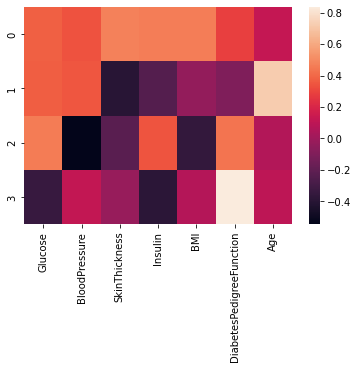

In [84]:
sns.heatmap(df)